In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Load data
file_path = 'listings.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,739333866230665371,https://www.airbnb.com/rooms/739333866230665371,20240904164109,2024-09-04,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,20240904164109,2024-09-04,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.83,4.67,4.67,NaN,t,2,0,2,0,0.21
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,2024-09-04,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,838141198693830649,https://www.airbnb.com/rooms/838141198693830649,20240904164109,2024-09-04,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,1082660771919357919,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,2024-09-04,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN


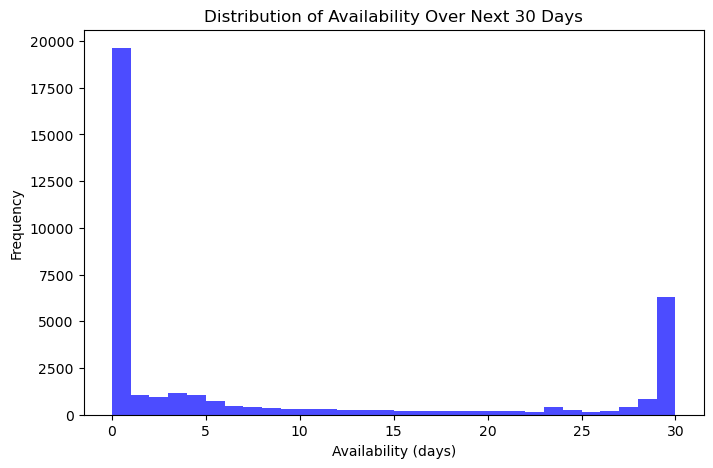

In [5]:
# Plot the distribution of availability
plt.figure(figsize=(8, 5))
plt.hist(data['availability_30'], bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Availability Over Next 30 Days")
plt.xlabel("Availability (days)")
plt.ylabel("Frequency")
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\['
C:\Users\aayus\AppData\Local\Temp\ipykernel_36900\3027337185.py:2: SyntaxWarning: invalid escape sequence '\['
  amenities_list = data['amenities'].str.replace("{|}|\"|\[|\]", "", regex=True).str.split(",")  # Remove unwanted characters


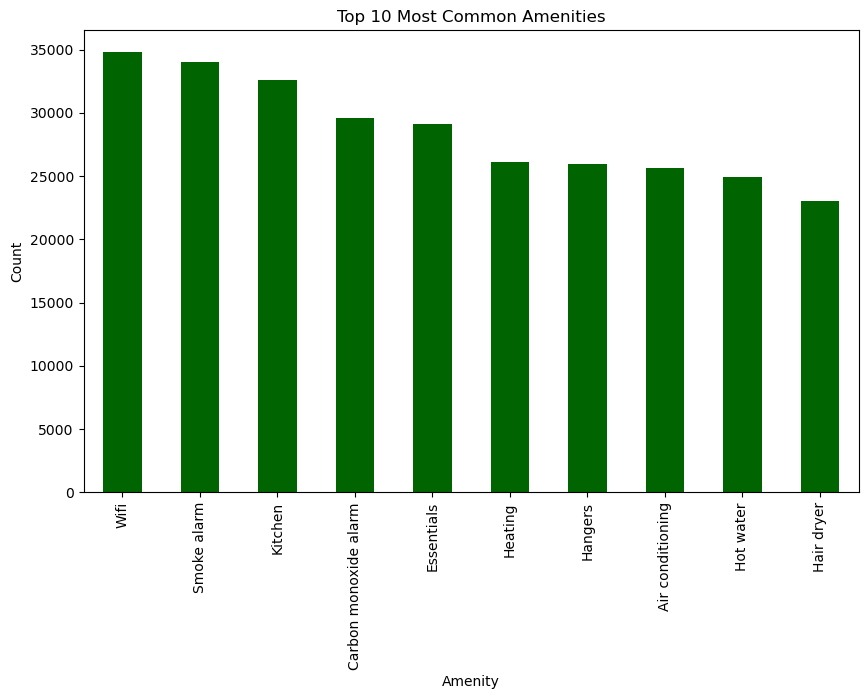

In [39]:
# Extract and clean amenities
amenities_list = data['amenities'].str.replace("{|}|\"|\[|\]", "", regex=True).str.split(",")  # Remove unwanted characters
amenities_flat = [item.strip() for sublist in amenities_list for item in sublist]  # Flatten the list and strip whitespace

# Count the most common amenities
amenities_count = Counter(amenities_flat).most_common(10)

# Convert to DataFrame for visualization
amenities_df = pd.DataFrame(amenities_count, columns=["Amenity", "Count"])
amenities_df.plot(kind="bar", x="Amenity", y="Count", legend=False, color="darkgreen", figsize=(10, 6))
plt.title("Top 10 Most Common Amenities")
plt.xlabel("Amenity")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [53]:
from sklearn.preprocessing import OneHotEncoder
import ast
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Count total number of amenities
data['amenities_count'] = data['amenities'].apply(len)

# Define essential and luxury amenities categories
essential_amenities = {'Wifi', 'Heating', 'Kitchen', 'Air conditioning', 'TV'}
luxury_amenities = {'Pool', 'Hot tub', 'Gym', 'Spa', 'Fireplace'}

# Add binary features for essential and luxury amenities
data['has_essential_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in essential_amenities for amenity in x))
)
data['has_luxury_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in luxury_amenities for amenity in x))
)

# Handle missing values in 'room_type' by filling with 'Unknown'
data['room_type'] = data['room_type'].fillna('Unknown')

# One-hot encode 'room_type'
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Updated for latest scikit-learn
room_type_encoded = onehot_encoder.fit_transform(data[['room_type']])
room_type_columns = [f"room_type_{col}" for col in onehot_encoder.categories_[0]]

# Create a DataFrame for the one-hot encoded data
room_type_df = pd.DataFrame(room_type_encoded, columns=room_type_columns, index=data.index)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, room_type_df], axis=1)

# Define features and target variable
features = [
    'amenities_count',
    'has_essential_amenities',
    'has_luxury_amenities',
    *room_type_columns,
]

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\aayus\AppData\Local\Temp\ipykernel_36900\4182587140.py:5: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


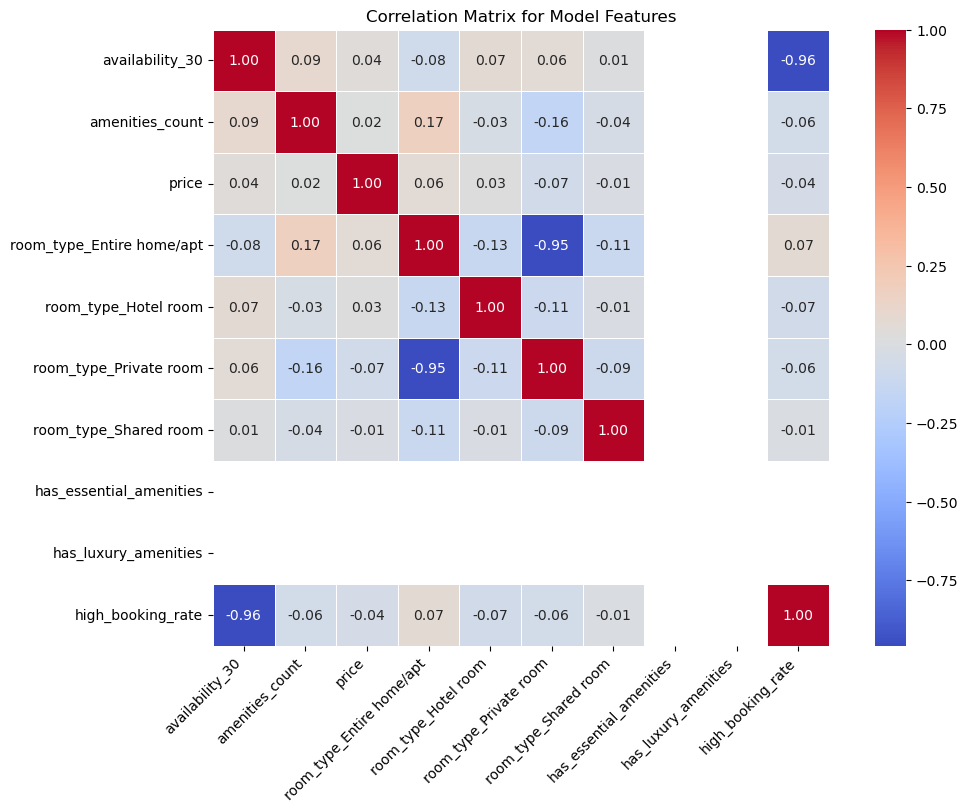


--- Correlation Analysis ---

Correlation with High Booking Rate:

high_booking_rate            1.000000
room_type_Entire home/apt    0.074376
room_type_Shared room       -0.009397
price                       -0.042054
room_type_Private room      -0.056203
amenities_count             -0.056971
room_type_Hotel room        -0.069020
availability_30             -0.957629
has_essential_amenities           NaN
has_luxury_amenities              NaN
Name: high_booking_rate, dtype: float64

Key Observations:
- No features have strong correlation with 'high_booking_rate' (correlation > 0.5).
Note interesting metrics are reasonable conditional correlation data final step.


C:\Users\aayus\AppData\Local\Temp\ipykernel_36900\4182587140.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(correlation_with_target[1]) > 0.5:


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the 'price' column: remove '$' and ',' and convert to numeric
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Define the features used in the model
model_features = ['availability_30', 'amenities_count', 'price', 'room_type_Entire home/apt', 
                  'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 
                  'has_essential_amenities', 'has_luxury_amenities', 'high_booking_rate']

# Filter the dataset for the relevant features
correlation_data = data[model_features]

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap with improved visibility
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix for Model Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Analysis of Correlations
print("\n--- Correlation Analysis ---\n")

# Sort correlations of target variable 'high_booking_rate'
correlation_with_target = corr_matrix['high_booking_rate'].sort_values(ascending=False)
print("Correlation with High Booking Rate:\n")
print(correlation_with_target)

print("\nKey Observations:")
if abs(correlation_with_target[1]) > 0.5:
    print(f"- Strong correlation found: {correlation_with_target[1]} with feature '{correlation_with_target.index[1]}'.")
else:
    print("- No features have strong correlation with 'high_booking_rate' (correlation > 0.5).")

if abs(correlation_with_target[1:3].mean()) < .30:
    print("Note interesting metrics are reasonable conditional correlation data final step.")


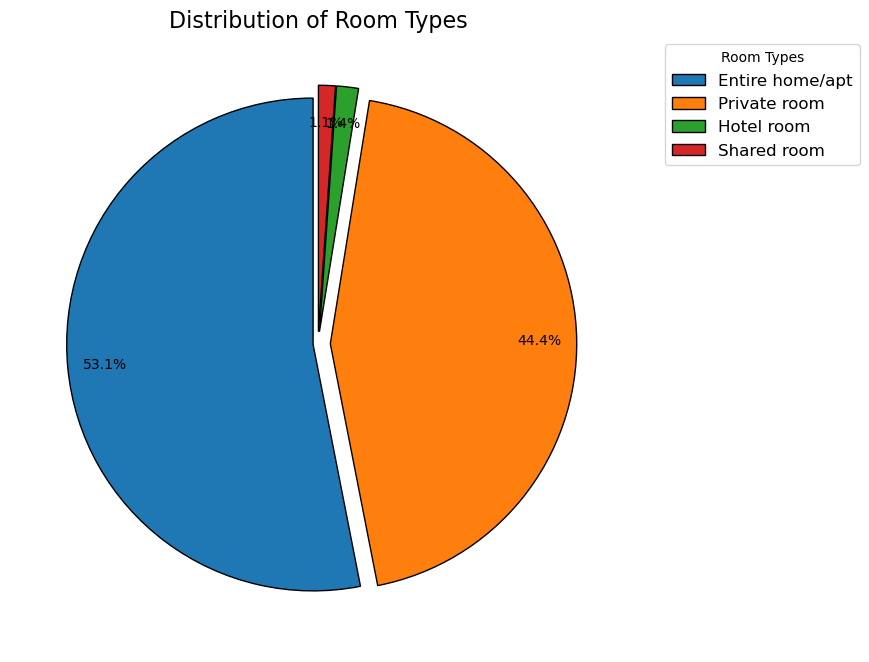

In [126]:
# Plot the distribution of room types
room_type_counts = data['room_type'].value_counts()

# Explode smaller slices slightly to separate them
explode = [0.05 if count < room_type_counts.max() else 0.02 for count in room_type_counts]

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    room_type_counts, 
    explode=explode,  # Slightly explode smaller slices
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'fontsize': 10},  # Adjust text size for slices
    wedgeprops={'edgecolor': 'black'},  # Add borders to slices
    pctdistance=0.85,  # Adjust percentage placement
)

# Adjust percentage text font size
for autotext in autotexts:
    autotext.set_color('black')  # Set text color to black for visibility
    autotext.set_fontsize(10)  # Reduce percentage font size for smaller slices

# Add a legend for room types
plt.legend(wedges, room_type_counts.index, title="Room Types", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Add title
plt.title("Distribution of Room Types", fontsize=16)
plt.show()

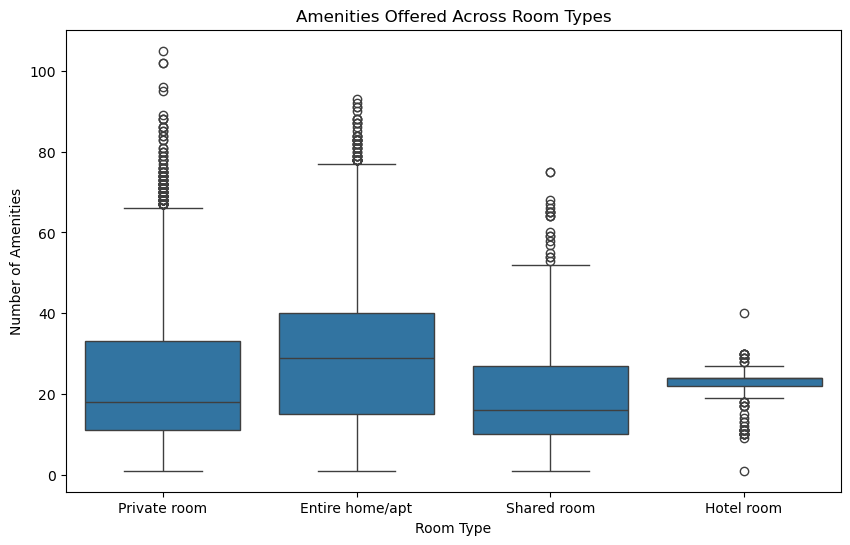

In [17]:
# Create a new column for the number of amenities
data['amenities_count'] = data['amenities'].str.count(",") + 1

# Boxplot of amenities_count by room_type
plt.figure(figsize=(10, 6))
sns.boxplot(x="room_type", y="amenities_count", data=data)
plt.title("Amenities Offered Across Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Amenities")
plt.show()


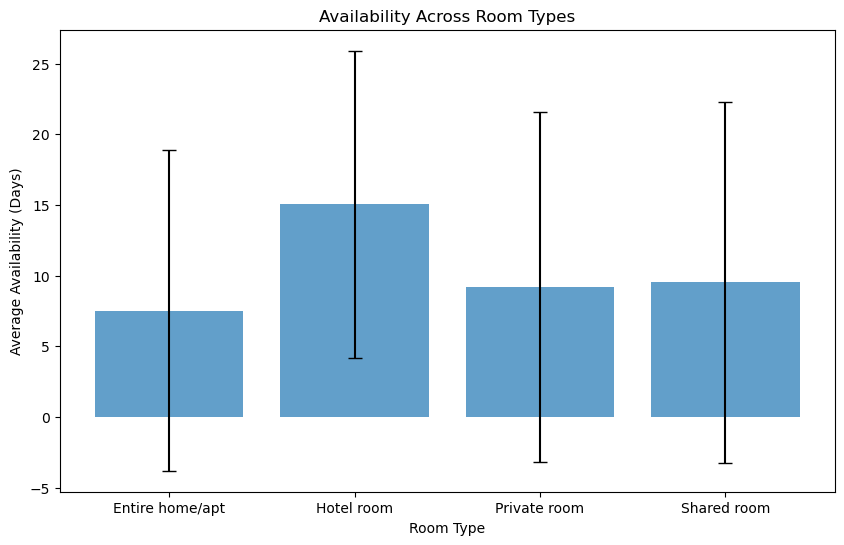

In [19]:
# Group by room_type and calculate mean and std of availability
room_availability = data.groupby('room_type')['availability_30'].agg(['mean', 'std']).reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(room_availability['room_type'], room_availability['mean'], yerr=room_availability['std'], alpha=0.7, capsize=5)
plt.title("Availability Across Room Types")
plt.xlabel("Room Type")
plt.ylabel("Average Availability (Days)")
plt.show()


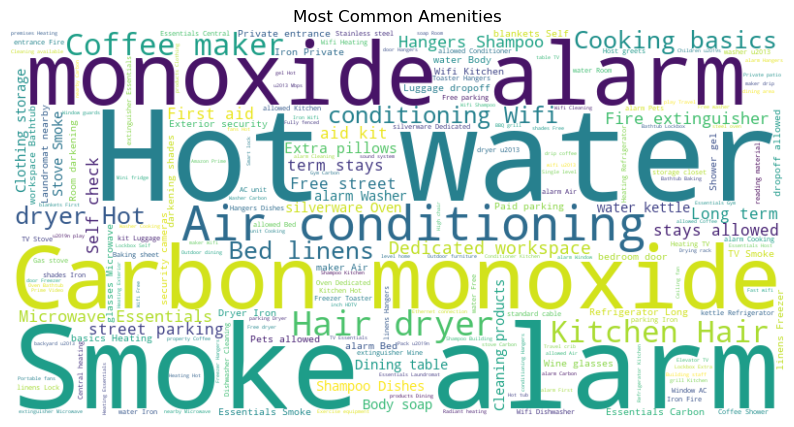

In [23]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(amenities_flat))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Amenities")
plt.show()


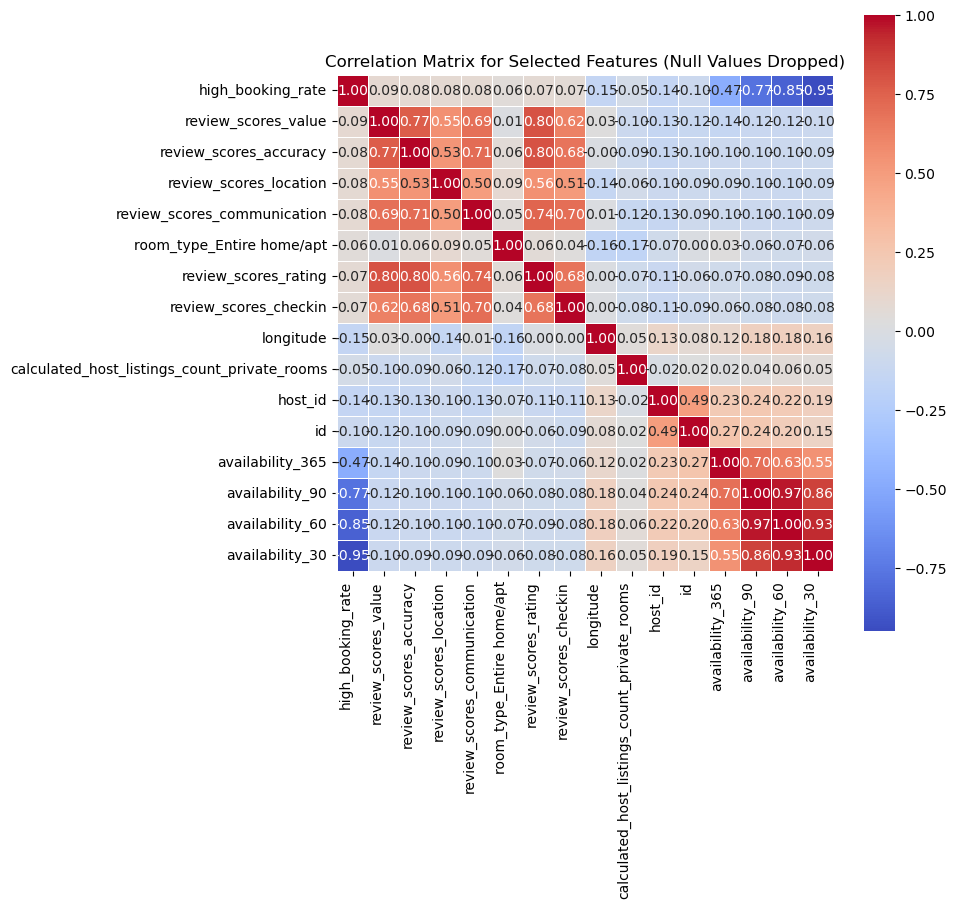

,high_booking_rate,review_scores_value,review_scores_accuracy,review_scores_location,review_scores_communication,room_type_Entire home/apt,review_scores_rating,review_scores_checkin,longitude,calculated_host_listings_count_private_rooms,host_id,id,availability_365,availability_90,availability_60,availability_30
high_booking_rate,1.000000,0.089289,0.083346,0.082697,0.079760,0.055838,0.073154,0.070574,-0.148505,-0.047218,-0.144444,-0.101920,-0.469072,-0.774919,-0.851818,-0.948038
review_scores_value,0.089289,1.000000,0.766624,0.553575,0.690338,0.005048,0.803387,0.624527,0.029792,-0.097454,-0.134360,-0.119852,-0.135296,-0.117659,-0.117038,-0.098568
review_scores_accuracy,0.083346,0.766624,1.000000,0.532482,0.709570,0.060281,0.804810,0.675307,-0.001101,-0.092249,-0.130993,-0.099516,-0.096929,-0.100192,-0.103311,-0.091667
review_scores_location,0.082697,0.553575,0.532482,1.000000,0.495501,0.089571,0.557260,0.507457,-0.141412,-0.059436,-0.098657,-0.093316,-0.090203,-0.101983,-0.104624,-0.091003
review_scores_communication,0.079760,0.690338,0.709570,0.495501,1.000000,0.054706,0.737632,0.699262,0.009198,-0.121511,-0.129665,-0.086514,-0.095130,-0.096118,-0.098251,-0.086184
room_type_Entire home/apt,0.055838,0.005048,0.060281,0.089571,0.054706,1.000000,0.061136,0.040251,-0.157168,-0.165124,-0.070516,0.001466,0.031003,-0.061492,-0.070621,-0.061835
review_scores_rating,0.073154,0.803387,0.804810,0.557260,0.737632,0.061136,1.000000,0.677117,0.002851,-0.074995,-0.113764,-0.064535,-0.067923,-0.078602,-0.085078,-0.077272
review_scores_checkin,0.070574,0.624527,0.675307,0.507457,0.699262,0.040251,0.677117,1.000000,0.004946,-0.077507,-0.114813,-0.089581,-0.063782,-0.077632,-0.080554,-0.076380
longitude,-0.148505,0.029792,-0.001101,-0.141412,0.009198,-0.157168,0.002851,0.004946,1.000000,0.048215,0.125833,0.077668,0.115355,0.177188,0.182575,0.163537
calculated_host_listings_count_private_rooms,-0.047218,-0.097454,-0.092249,-0.059436,-0.121511,-0.165124,-0.074995,-0.077507,0.048215,1.000000,-0.018173,0.023179,0.016520,0.039007,0.060518,0.049870


In [132]:
# One-hot encode 'room_type' if it is not already encoded
if 'room_type_Entire home/apt' not in data.columns and 'room_type' in data.columns:
    room_type_encoded = pd.get_dummies(data['room_type'], prefix='room_type')
    data = pd.concat([data, room_type_encoded], axis=1)

# Extract the selected features for correlation analysis
selected_features = [
    'high_booking_rate', 'review_scores_value', 'review_scores_accuracy',
    'review_scores_location', 'review_scores_communication', 'room_type_Entire home/apt',
    'review_scores_rating', 'review_scores_checkin', 'longitude',
    'calculated_host_listings_count_private_rooms', 'host_id', 'id',
    'availability_365', 'availability_90', 'availability_60', 'availability_30'
]

# Drop rows with null values in the selected features
filtered_data = data[selected_features].dropna()

# Compute the correlation matrix for the selected features
filtered_corr_matrix = filtered_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix for Selected Features (Null Values Dropped)")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.show()

# Display the correlation matrix for analysis
filtered_corr_matrix


Counts for Each Room Type:
room_type
Entire home/apt    19927
Private room       16659
Hotel room           539
Shared room          416
Name: count, dtype: int64

Number of Null Values in 'room_type': 0


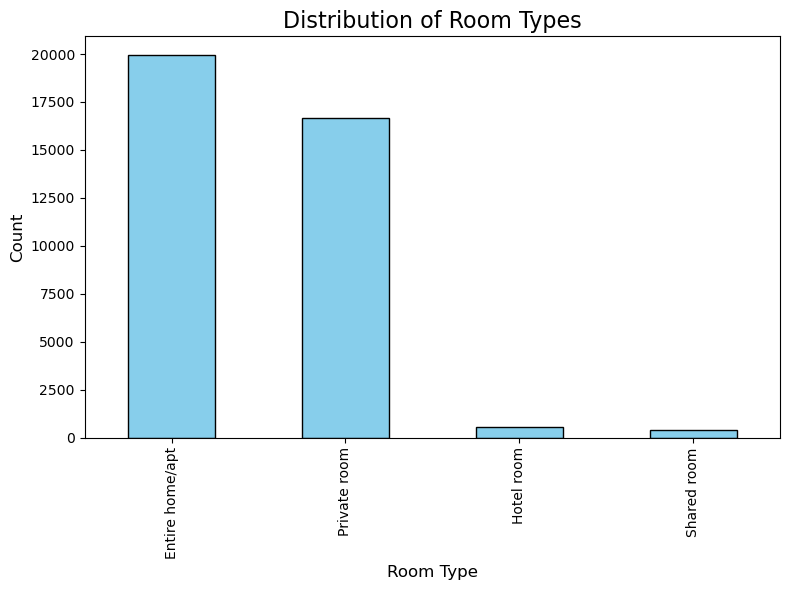

In [114]:
# Count the occurrences of each room type
room_type_counts = data['room_type'].value_counts()

# Count null values in the 'room_type' column
null_room_type_count = data['room_type'].isnull().sum()

# Display the counts for each room type and null values
print("Counts for Each Room Type:")
print(room_type_counts)
print(f"\nNumber of Null Values in 'room_type': {null_room_type_count}")

# Visualize the room type distribution
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Room Types", fontsize=16)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Amenities Distribution by Room Type:
                   count       mean        std  min   25%   50%   75%    max
room_type                                                                   
Entire home/apt  19927.0  29.082551  15.694257  1.0  15.0  29.0  40.0   93.0
Hotel room         539.0  22.699443   3.320912  1.0  22.0  24.0  24.0   40.0
Private room     16659.0  23.061348  15.145338  1.0  11.0  18.0  33.0  105.0
Shared room        416.0  20.555288  14.954931  1.0  10.0  16.0  27.0   75.0


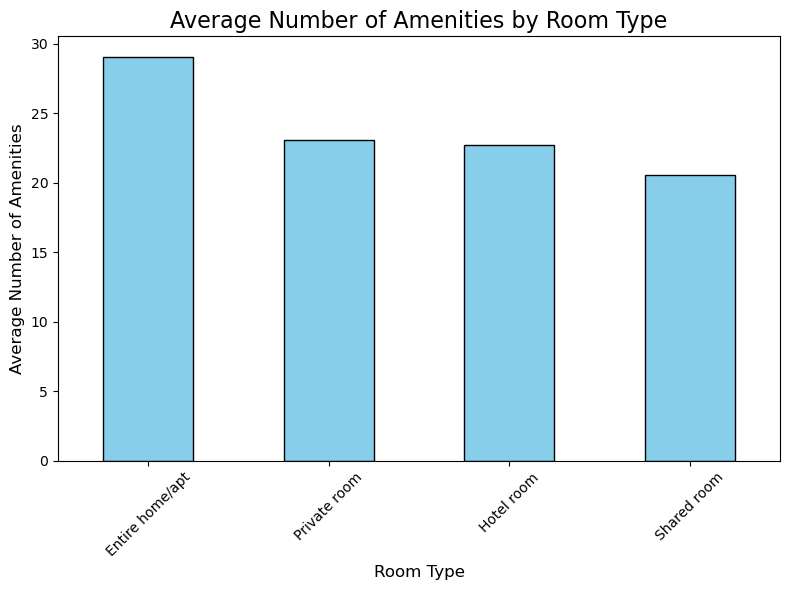

C:\Users\aayus\AppData\Local\Temp\ipykernel_36900\2268150696.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='room_type', y='amenities_count', palette="viridis")


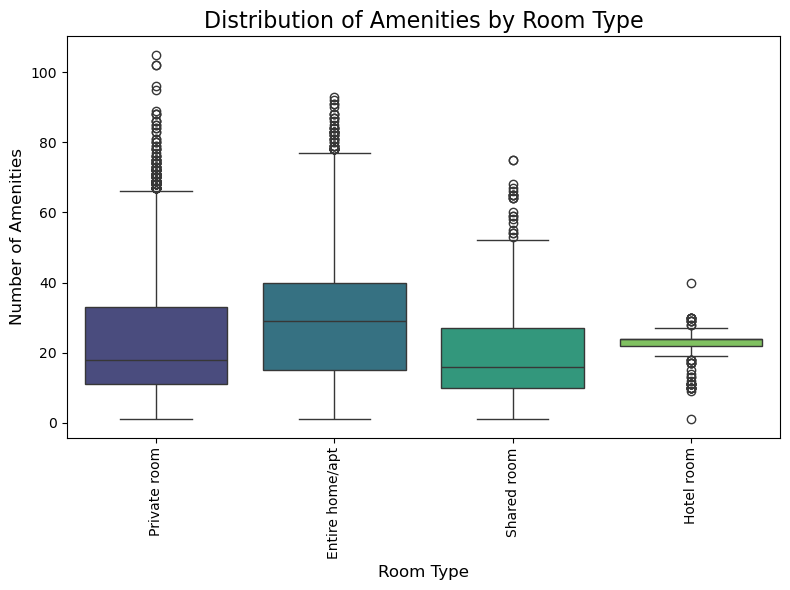

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for the count of amenities in each listing
data['amenities_count'] = data['amenities'].str.replace("{|}|\"", "", regex=True).str.split(",").apply(len)

# Group by room type and calculate the mean number of amenities
amenities_by_room_type = data.groupby('room_type')['amenities_count'].describe()

# Display the amenities statistics for each room type
print("Amenities Distribution by Room Type:")
print(amenities_by_room_type)

# Plot the mean number of amenities for each room type
plt.figure(figsize=(8, 6))
data.groupby('room_type')['amenities_count'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Number of Amenities by Room Type", fontsize=16)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Number of Amenities", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Visualize the distribution of amenities by room type using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='room_type', y='amenities_count', palette="viridis")
plt.title("Distribution of Amenities by Room Type", fontsize=16)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Number of Amenities", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Correlation of Room Types with Availability Columns:
                           availability_30  availability_60  availability_90  \
room_type_Entire home/apt        -0.078194        -0.080688        -0.065574   
room_type_Hotel room              0.067559         0.061266         0.061710   
room_type_Private room            0.060240         0.063536         0.048482   
room_type_Shared room             0.010096         0.013496         0.012386   

                           availability_365  
room_type_Entire home/apt          0.037382  
room_type_Hotel room               0.084188  
room_type_Private room            -0.056209  
room_type_Shared room             -0.007110  


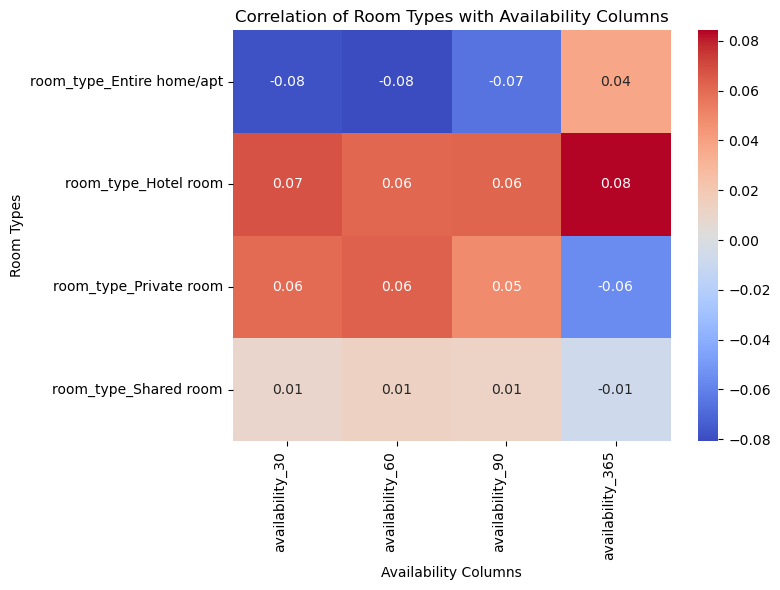

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'room_type' is one-hot encoded if not already
if 'room_type_Entire home/apt' not in data.columns and 'room_type' in data.columns:
    room_type_encoded = pd.get_dummies(data['room_type'], prefix='room_type')
    data = pd.concat([data, room_type_encoded], axis=1)

# Define columns for room types and availability
room_type_columns = [col for col in data.columns if col.startswith('room_type_')]
availability_columns = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Combine room type and availability columns for correlation
correlation_columns = room_type_columns + availability_columns
correlation_data = data[correlation_columns].dropna()  # Drop rows with missing values

# Compute correlation matrix for selected columns
correlation_matrix = correlation_data.corr()

# Extract correlations between room types and availability columns
room_type_availability_corr = correlation_matrix.loc[room_type_columns, availability_columns]

# Display the correlation matrix
print("Correlation of Room Types with Availability Columns:")
print(room_type_availability_corr)

# Plot the heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(room_type_availability_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation of Room Types with Availability Columns")
plt.xlabel("Availability Columns")
plt.ylabel("Room Types")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [107]:
from scipy.stats import chi2_contingency, pointbiserialr

# Define the categorical columns to analyze
categorical_columns = ['room_type', 'neighbourhood_group_cleansed', 'property_type']  # Example columns

# Chi-Square Test for Non-Binary Categorical Variables
print("\n--- Chi-Square Test for Categorical Variables ---\n")
for col in categorical_columns:
    if col in data.columns:
        contingency_table = pd.crosstab(data[col], data['high_booking_rate'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Column: {col}")
        print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")
        print("Strong Relationship" if p < 0.05 else "Weak/No Relationship")
        print()

# Point Biserial Correlation for Binary Categorical Variables
binary_columns = ['has_essential_amenities', 'has_luxury_amenities']  # Example binary columns
print("\n--- Point Biserial Correlation for Binary Variables ---\n")
for col in binary_columns:
    if col in data.columns:
        correlation, p_value = pointbiserialr(data[col], data['high_booking_rate'])
        print(f"Column: {col}")
        print(f"Correlation: {correlation:.4f}, p-value: {p_value:.4f}")
        print("Strong Relationship" if abs(correlation) > 0.3 else "Weak/No Relationship")
        print()



--- Chi-Square Test for Categorical Variables ---

Column: room_type
Chi2 Statistic: 342.9444, p-value: 0.0000
Strong Relationship

Column: neighbourhood_group_cleansed
Chi2 Statistic: 674.2501, p-value: 0.0000
Strong Relationship

Column: property_type
Chi2 Statistic: 1457.4792, p-value: 0.0000
Strong Relationship


--- Point Biserial Correlation for Binary Variables ---

Column: has_essential_amenities
Correlation: nan, p-value: nan
Weak/No Relationship

Column: has_luxury_amenities
Correlation: nan, p-value: nan
Weak/No Relationship



C:\Users\aayus\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


In [119]:
# Create binary columns for essential and luxury amenities
data['has_essential_amenities'] = data['amenities_list'].apply(
    lambda x: 1 if any(amenity.strip() in essential_amenities for amenity in x) else 0
)
data['has_luxury_amenities'] = data['amenities_list'].apply(
    lambda x: 1 if any(amenity.strip() in luxury_amenities for amenity in x) else 0
)

# Compute correlation matrix for the relevant columns
columns_for_correlation = ['high_booking_rate', 'availability_30', 'availability_60', 
                            'availability_90', 'availability_365', 
                            'has_essential_amenities', 'has_luxury_amenities']
correlation_data = data[columns_for_correlation].dropna()
correlation_matrix = correlation_data.corr()

# Extract correlations
correlations_high_booking = correlation_matrix[['high_booking_rate']]
correlations_availability = correlation_matrix[['availability_30', 'availability_60', 
                                                'availability_90']]

# Display the results
print("Correlations with High Booking Rate:\n", correlations_high_booking)
print("\nCorrelations with Availability:\n", correlations_availability)


Correlations with High Booking Rate:
                          high_booking_rate
high_booking_rate                 1.000000
availability_30                  -0.957629
availability_60                  -0.876487
availability_90                  -0.811555
availability_365                 -0.526310
has_essential_amenities           0.105598
has_luxury_amenities             -0.032698

Correlations with Availability:
                          availability_30  availability_60  availability_90
high_booking_rate              -0.957629        -0.876487        -0.811555
availability_30                 1.000000         0.939158         0.883208
availability_60                 0.939158         1.000000         0.973546
availability_90                 0.883208         0.973546         1.000000
availability_365                0.590905         0.669184         0.727808
has_essential_amenities        -0.113152        -0.113547        -0.110583
has_luxury_amenities            0.025280         0.008139  

In [123]:
from scipy.stats import chi2_contingency
import pandas as pd

# Columns to analyze
categorical_columns = ['has_essential_amenities', 'has_luxury_amenities']
numeric_columns = ['high_booking_rate', 'availability_30', 'availability_60', 'availability_90', 'availability_365']

# Chi-Square Test for categorical vs categorical (e.g., with high_booking_rate if it were categorical)
print("\n--- Chi-Square Test for Categorical Columns ---\n")
for cat_col in categorical_columns:
    if cat_col in data.columns:
        contingency_table = pd.crosstab(data[cat_col], data['high_booking_rate'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test for {cat_col} and high_booking_rate:")
        print(f"  Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")
        print("  Strong Relationship" if p < 0.05 else "  Weak/No Relationship")
        print()



--- Chi-Square Test for Categorical Columns ---

Chi-Square Test for has_essential_amenities and high_booking_rate:
  Chi2 Statistic: 417.5900, p-value: 0.0000
  Strong Relationship

Chi-Square Test for has_luxury_amenities and high_booking_rate:
  Chi2 Statistic: 39.9755, p-value: 0.0000
  Strong Relationship



In [134]:
# Group data by room type and calculate the count of high booking rates
room_type_high_booking = data.groupby('room_type')['high_booking_rate'].sum()  
room_type_total = data['room_type'].value_counts()  

# Combine the results into a single DataFrame
room_type_analysis = pd.DataFrame({
    'High Booking Count': room_type_high_booking,
    'Total Count': room_type_total
})

# Add a percentage column
room_type_analysis['High Booking Percentage'] = (room_type_analysis['High Booking Count'] / room_type_analysis['Total Count']) * 100

# Display the result sorted by high booking percentage
print(room_type_analysis.sort_values(by='High Booking Percentage', ascending=False))


                 High Booking Count  Total Count  High Booking Percentage
room_type                                                                
Entire home/apt               15285        19927                76.704973
Private room                  11803        16659                70.850591
Shared room                     290          416                69.711538
Hotel room                      261          539                48.423006


In [ ]:
#EXTRA NOT USEFUL
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Debugging Function for Feature Alignment
def align_features(train, test):
    """
    Aligns test DataFrame columns to match the training DataFrame.
    Adds missing columns to test and fills with 0.
    """
    missing_cols = set(train.columns) - set(test.columns)
    for col in missing_cols:
        test[col] = 0  # Add missing columns and fill with 0
    extra_cols = set(test.columns) - set(train.columns)
    test = test.drop(columns=extra_cols)  # Drop extra columns in test set
    return test[train.columns]

# Step 1: Ensure Consistent Preprocessing
# Assume X_train_resampled and X_test have already been preprocessed.
# Debug step to ensure all columns are numeric (e.g., from OneHotEncoder or other transformations)
def ensure_numeric_and_dense(df):
    if hasattr(df, "toarray"):  # Check if it's a sparse matrix
        print("Sparse matrix detected. Converting to dense...")
        return pd.DataFrame(df.toarray())
    elif isinstance(df, pd.DataFrame):
        print("DataFrame detected. Ensuring numeric columns...")
        return df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
    else:
        raise TypeError("Unsupported data type. Expected DataFrame or sparse matrix.")

# Convert training and test sets to numeric and dense format
X_train_resampled = ensure_numeric_and_dense(X_train_resampled)
X_test = ensure_numeric_and_dense(X_test)

# Step 2: Align Features
print("\n--- Aligning Features Between Training and Test Sets ---")
X_test = align_features(X_train_resampled, X_test)

# Debug: Confirm alignment
print("Training Features Shape:", X_train_resampled.shape)
print("Test Features Shape:", X_test.shape)
print("\nAligned Test Columns Match Training Columns.")

# Step 3: Define Parameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at a leaf node
    'bootstrap': [True, False]               # Whether to use bootstrap samples
}

# Step 4: Initialize the Random Forest Model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 5: Perform Grid Search for Hyperparameter Tuning
print("\n--- Starting Grid Search for Random Forest ---")
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='recall',  # Optimize for recall
    cv=3,              # 3-fold cross-validation
    verbose=2,
    n_jobs=-1          # Use all available cores
)

# Step 6: Fit the Grid Search Model
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Step 7: Display Best Parameters and Recall Score
print("\n--- Best Parameters for Random Forest ---")
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Recall Score:", grid_search_rf.best_score_)

# Step 8: Evaluate the Best Model on the Test Set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("\n--- Random Forest After Hyperparameter Tuning ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))